Dataset Head:
   Temperature    Rainfall  Soil_Type_Index   Humidity  Yield
0    29.490142  154.910307                1  64.896762    5.5
1    27.585207  146.794589                3  69.709396    5.5
2    29.943066  197.589538                1  66.261862    5.5
3    32.569090  226.641557                4  72.208868    5.5
4    27.297540  184.342347                3  77.597758    5.5

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature      50000 non-null  float64
 1   Rainfall         50000 non-null  float64
 2   Soil_Type_Index  50000 non-null  int64  
 3   Humidity         50000 non-null  float64
 4   Yield            50000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 1.9 MB
None

Summary Statistics:
        Temperature      Rainfall  Soil_Type_Index      Humidity         Yield
count  50000.0

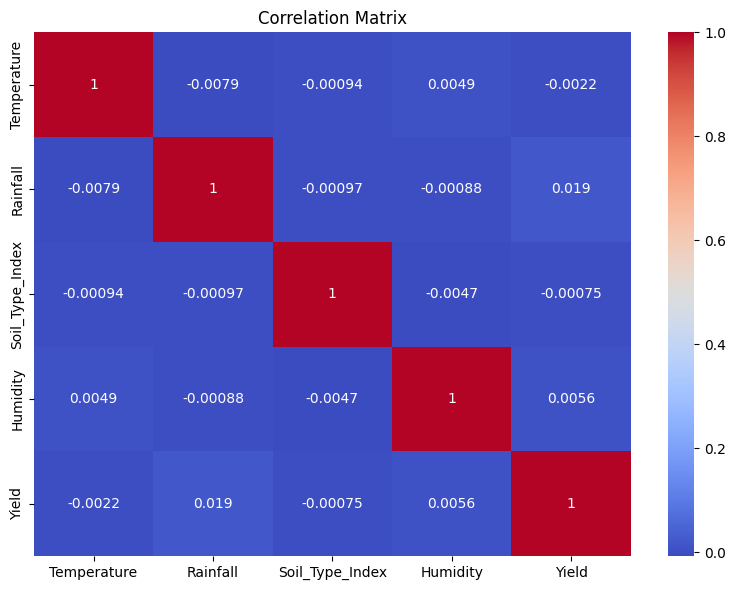

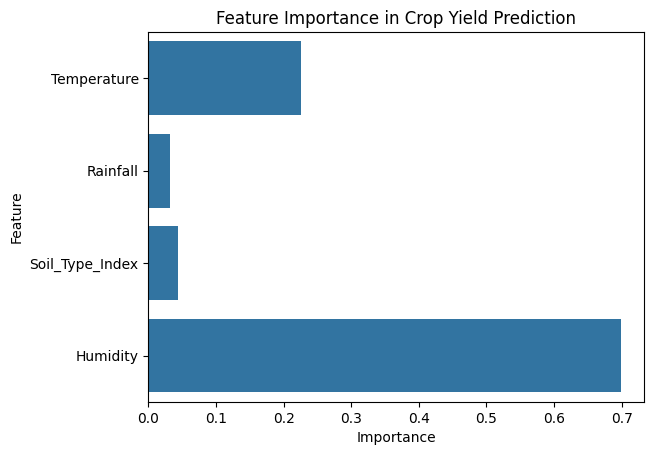

In [ ]:
# production_yield_model.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Data set/crop_yield_50000.csv")

# Exploratory Data Analysis

print("Dataset Head:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

# Feature Selection

features = ['Temperature', 'Rainfall', 'Soil_Type_Index', 'Humidity']
X = df[features]
y = df['Yield']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions & Evaluation

y_pred = model.predict(X_test)

print("\nModel Performance:")
print("R² Score:", r2_score(y_test, y_pred))

# Calculate MSE and then take the square root for RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# Feature Importance

importances = model.feature_importances_
plt.figure()
sns.barplot(x=importances, y=features)
plt.title("Feature Importance in Crop Yield Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
